<a href="https://colab.research.google.com/github/wulanasyifaa/CreditRisk/blob/main/Prediction_Model_Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project from : Rakamin

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Understanding**

## Import Data

In [ ]:
# load the dataset
data = pd.read_csv('/content/loan_data_2007_2014.csv')

# check shape of dataset
print("shape of the data:", data.shape)
data.head(5)

<ipython-input-2-a4337e186700>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/loan_data_2007_2014.csv')


shape of the data: (466285, 75)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This dataset contains borrower data and loan information from a lending platform. The primary goal of the dataset is to predict **credit risk** — whether a borrower will repay their loan or default.

Target Variable (Y) (1 variable):
* **loan_status** → Loan payment status (indicating whether the borrower has paid or defaulted on the loan).

Predictor Variables (X) (Some examples out of the total 74 variables):
* **loan_amnt** → The loan amount requested by the borrower.
* **term** → The term or duration of the loan.
* **int_rate** → The interest rate on the loan.
* **grade** → The credit grade of the borrower.
* **emp_title** → The job title of the borrower.
* **emp_length** → The number of years the borrower has been employed.
* **home_ownership** → The borrower’s home ownership status.
* **annual_inc** → The borrower’s annual income.
* **verification_status** → The status of income verification.
* **purpose** → The purpose for which the loan is taken (e.g., debt consolidation, home improvement).
* **dti** → The debt-to-income ratio, indicating the borrower’s total debt relative to income.
* **open_acc** → The number of open credit accounts the borrower has.
* **revol_util** → The utilization rate of revolving credit.
* **application_type** → The type of application (individual or joint).

(And many more up to a total of 74 predictor variables.)

## Check if Each Row Represents One Individual

In [ ]:
# Check the number of unique values in the 'id' column and the 'member_id' column
num_rows = data['id'].nunique()
num_unique = data['member_id'].nunique()

# Check if each row represents one individual
if num_rows == num_unique:
    print("Each row represents one individual.")
else:
    print("There are duplicates in the data.")

Each row represents one individual.


The output "Each row represents one individual." indicates that there are no duplicates in the dataset, meaning each row represents a unique individual.

## Check Data Info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

1. Number of Entities: The dataset consists of 466,285 entries or rows of data.

2. Columns and Data Types:
* Number of Columns: There are 75 columns in the dataset.
* Data Types: There are three main data types:
  * float64 (46 columns): Contains numeric data (e.g., loan_amnt, annual_inc, open_acc, etc.).
  * int64 (7 columns): Contains integer numeric data (e.g., policy_code, dti, etc.).
  * object (22 columns): Contains categorical or text data (e.g., grade, emp_title, home_ownership, etc.).

3. Number of Non-Null Values: Every column in the dataset has the same number of non-null values as the total number of entries (466,285), meaning there are no missing values in the dataset for any column.


# **Feature Engineering**

## Drop kolom yang tidak digunakan

In [ ]:
# Defining columns will be dropped
cols_to_drop = [
    # unique id
    'Unnamed: 0',
    'id',
    'member_id',

    # free text
    'url',
    'desc',

    # all null / constant / others
    'funded_amnt',
    'funded_amnt_inv',
    'installment',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'out_prncp_inv',
    'collection_recovery_fee',
    'last_pymnt_amnt',
    'zip_code',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'mths_since_last_major_derog',
    'tot_coll_amt',
    'tot_cur_bal',
    'total_rev_hi_lim',

    # expert judgment
    'sub_grade'
]

In [ ]:
data.drop(cols_to_drop, axis=1, inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  object 
 2   int_rate                    466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   emp_title                   438697 non-null  object 
 5   emp_length                  445277 non-null  object 
 6   home_ownership              466285 non-null  object 
 7   annual_inc                  466281 non-null  float64
 8   verification_status         466285 non-null  object 
 9   issue_d                     466285 non-null  object 
 10  loan_status                 466285 non-null  object 
 11  pymnt_plan                  466285 non-null  object 
 12  purpose                     466285 non-null  object 
 13  title         

Based on the output after performing the drop() function on the dataset:

1. Number of Entries: The dataset still contains 466,285 entries (rows), which means no rows were dropped.

2. Number of Columns: The number of columns has decreased from 75 to 37 columns. This indicates that 38 columns were dropped from the dataset.

3. Data Types: The remaining columns consist of:
  * 16 columns with numeric data (float64).* 3 columns with integer data (int64).
  * 18 columns with categorical or text data (object).

4. Missing Data: There are no missing values (non-null values) in the remaining columns.

## Defining Target Variable

In [ ]:
persentase_loan_status = data.loan_status.value_counts(normalize=True) * 100
print(persentase_loan_status)

loan_status
Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: proportion, dtype: float64


* The majority of loans (48.09%) are in Current status.
* A significant portion (39.62%) has been Fully Paid.
* Late and Charged Off statuses are relatively low in comparison.

In [ ]:
bad_status = [
    'Charged Off',
    'Default',
    'Does not meet the credit policy. Status:Charged Off',
    'Late (31-120 days)'
]

data['bad_flag'] = np.where(data['loan_status'].isin(bad_status), 1, 0)

Next, a new column bad_flag is created to mark loans with "bad" statuses (such as Charged Off, Default, Late (31-120 days)) as 1, and other loans as 0. This step makes it easier to identify high-risk loans and can be used for further analysis or predictive modeling.

bad_flag
0    89.069346
1    10.930654
Name: proportion, dtype: float64


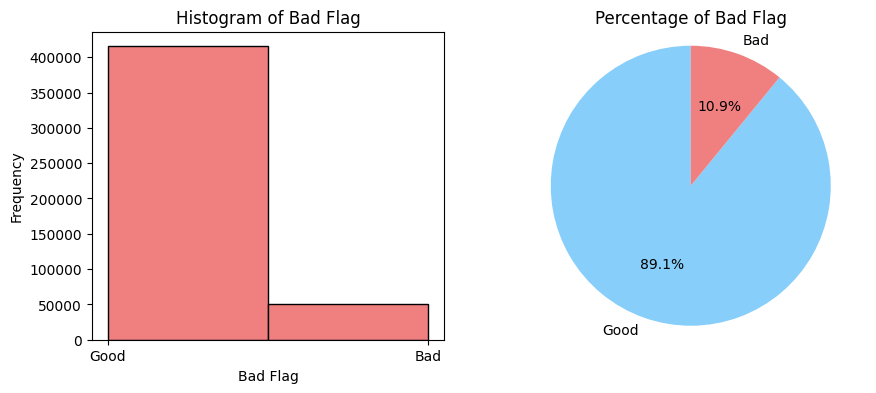

In [ ]:
persentase_bad_flag = data['bad_flag'].value_counts(normalize=True) * 100
print(persentase_bad_flag)

labels = ['Good', 'Bad']
sizes = data['bad_flag'].value_counts(normalize=True) * 100
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 baris, 2 kolom

# Histogram
ax1.hist(data['bad_flag'], bins=2, edgecolor='black', color='lightcoral') # Warna histogram: lightcoral
ax1.set_xlabel('Bad Flag')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Bad Flag')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Good', 'Bad'])

# Pie chart
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightskyblue', 'lightcoral']) # Warna pie chart: lightskyblue dan lightcoral
ax2.set_title('Percentage of Bad Flag')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()

The chart shows that 89.1% of loans are "Good," while 10.9% are "Bad" (high-risk loans), indicating a higher proportion of loans in good standing.

In [ ]:
# Dropping the original 'loan_status' column
data.drop('loan_status', axis=1, inplace=True)

## Data Cleaning Column : emp_length

In [ ]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
# Remove additional text and convert the data type to float
data['emp_length_int'] = data['emp_length'].str.replace(r'[^0-9]+', '', regex=True).astype(float)

In [ ]:
# Dropping the original 'emp_length' column
data.drop('emp_length', axis=1, inplace=True)

## Data Cleaning Column : term

In [ ]:
# Display unique values from the 'term' column
unique_terms = data['term'].unique()
print(unique_terms)

[' 36 months' ' 60 months']


In [ ]:
# Remove additional text and convert the data type to float
data['term_int'] = data['term'].str.replace('months', '').astype(float)

In [ ]:
# Dropping the original 'term' column
data.drop('term', axis=1, inplace=True)

## Data Cleaning Column : earliest_cr_line

In [ ]:
print(data['earliest_cr_line'].head(3))

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object


In [ ]:
# Convert 'earliest_cr_line' to date format
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
print(data['earliest_cr_line_date'].head(3))

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]


In [ ]:
# Calculate the number of months since 'earliest_cr_line' to the reference date
data['mths_since_earliest_cr_line'] = (pd.to_datetime('2017-12-01').to_period('M') - data['earliest_cr_line_date'].dt.to_period('M')).apply(lambda x: x.n if pd.notnull(x) else np.nan) # Handle NaT values by setting them to np.nan (or any desired value)
print(data['mths_since_earliest_cr_line'].head(3))

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64


In [ ]:
# Display descriptive statistics for the 'mths_since_earliest_cr_line' column
print(data['mths_since_earliest_cr_line'].describe())

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64


The mths_since_earliest_cr_line column shows the number of months since the earliest credit line. The mean is 239.48 months, with a range from -612 months to 587 months, indicating some data issues (negative values). Most loans have an earliest credit line between 183 and 285 months ago.

In [ ]:
# Display rows with 'mths_since_earliest_cr_line' less than 0
print(data[data['mths_since_earliest_cr_line'] <= 0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3))

     earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580           Sep-62            2062-09-01                       -537.0
1770           Sep-68            2068-09-01                       -609.0
2799           Sep-64            2064-09-01                       -561.0


The negative values appeared because Python misinterpreted the year "62" as 2062 instead of 1962, causing the month calculation to be negative.

To fix this, further preprocessing could be done to adjust the year 2062 to 1962. However, for now, I will replace the negative values with the maximum value of the feature. Since I know that negative values indicate very old data (from the 1920s), it is reasonable to replace them with the largest value in the dataset.

In [ ]:
# Replace 'mths_since_earliest_cr_line' values less than 0 with the maximum value
data.loc[data['mths_since_earliest_cr_line'] <= 0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [ ]:
# Drop the 'earliest_cr_line' and 'earliest_cr_line_date' columns
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

## Data Cleaning Column : issue_d

In [ ]:
# Convert 'issue_d' to date format
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')

In [ ]:
# Calculate the number of months since 'issue_d' to the reference date
data['mths_since_issue_d'] = (pd.to_datetime('2017-12-01').to_period('M') - data['issue_d_date'].dt.to_period('M')).apply(lambda x: x.n if pd.notnull(x) else np.nan)

In [ ]:
# Display descriptive statistics for the 'mths_since_issue_d' column
print(data['mths_since_issue_d'].describe())

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64


The mths_since_issue_d column shows the number of months since the loan was funded, with an average of 51.26 months. The values range from 36 months to 126 months, indicating that most loans were issued between 36 to 126 months ago, with an average loan issuance time around 51 months ago.

In [ ]:
# Drop the 'issue_d' and 'issue_d_date' columns as they are no longer needed
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

## Data Cleaning Column : last_pymnt_d

In [ ]:
# Convert 'last_pymnt_d' to date format
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')

In [ ]:
# Calculate the number of months since 'last_pymnt_d' to the reference date
data['mths_since_last_pymnt_d'] = (pd.to_datetime('2017-12-01').to_period('M') - data['last_pymnt_d_date'].dt.to_period('M')).apply(lambda x: x.n if pd.notnull(x) else np.nan)

In [ ]:
# Display descriptive statistics for the 'mths_since_last_pymnt_d' column
print(data['mths_since_last_pymnt_d'].describe())

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64


The mths_since_last_pymnt_d column represents the number of months since the last payment was received for the loan. The average is 31.29 months, with values ranging from 23 months to 120 months. Most loans have had their last payment made between 23 and 35 months ago, with the average being around 31 months since the last payment.

In [ ]:
# Drop the 'last_pymnt_d' and 'last_pymnt_d_date' columns
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

## Data Cleaning Column : next_pymnt_d

In [ ]:
# Convert 'next_pymnt_d' to date format
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')

In [ ]:
# Calculate the number of months since 'next_pymnt_d' to the reference date
data['mths_since_next_pymnt_d'] = (pd.to_datetime('2017-12-01').to_period('M') - data['next_pymnt_d_date'].dt.to_period('M')).apply(lambda x: x.n if pd.notnull(x) else np.nan)

In [ ]:
# Display descriptive statistics for the 'mths_since_next_pymnt_d' column
print(data['mths_since_next_pymnt_d'].describe())

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64


The mths_since_next_pymnt_d column shows the number of months since the next scheduled payment date. The mean is 22.74 months, with values ranging from 21 to 120 months. Most values are around 22 months, indicating that the next payment is generally scheduled in the near future, typically within 21 to 22 months.

In [ ]:
# Drop the 'next_pymnt_d' and 'next_pymnt_d_date' columns
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

## Data Cleaning Column : last_credit_pull_d

In [ ]:
# Convert 'last_credit_pull_d' to date format
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')

In [ ]:
# Calculate the number of months since 'last_credit_pull_d_date' to the reference date
data['mths_since_last_credit_pull_d'] = (pd.to_datetime('2017-12-01').to_period('M') - data['last_credit_pull_d_date'].dt.to_period('M')).apply(lambda x: x.n if pd.notnull(x) else np.nan)

In [ ]:
# Display descriptive statistics for the 'mths_since_last_credit_pull_d' column
print(data['mths_since_last_credit_pull_d'].describe())

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64


The mths_since_last_credit_pull_d column shows the number of months since the last credit check. The average is 27.05 months, with most loans having their last credit check between 23 to 25 months ago, and the maximum being 127 months.

In [ ]:
# Drop the 'last_credit_pull_d' and 'last_credit_pull_d_date' columns
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# **Exploratory Data Analysis**

## Check Correlation

In [ ]:
# Select only numeric features for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

                               loan_amnt  int_rate  annual_inc       dti  \
loan_amnt                       1.000000  0.167183    0.370893  0.057319   
int_rate                        0.167183  1.000000   -0.046072  0.159657   
annual_inc                      0.370893 -0.046072    1.000000 -0.188548   
dti                             0.057319  0.159657   -0.188548  1.000000   
delinq_2yrs                     0.006841  0.079190    0.058896 -0.003694   
inq_last_6mths                 -0.020328  0.205641    0.056675 -0.012541   
mths_since_last_delinq         -0.041361 -0.046605   -0.058960  0.007574   
mths_since_last_record          0.011523 -0.008992   -0.097235  0.082449   
open_acc                        0.204182  0.012307    0.157784  0.303914   
pub_rec                        -0.081137  0.066695   -0.015439 -0.046192   
revol_bal                       0.331423 -0.004589    0.332316  0.143380   
revol_util                      0.117756  0.323365    0.037582  0.200412   
total_acc   

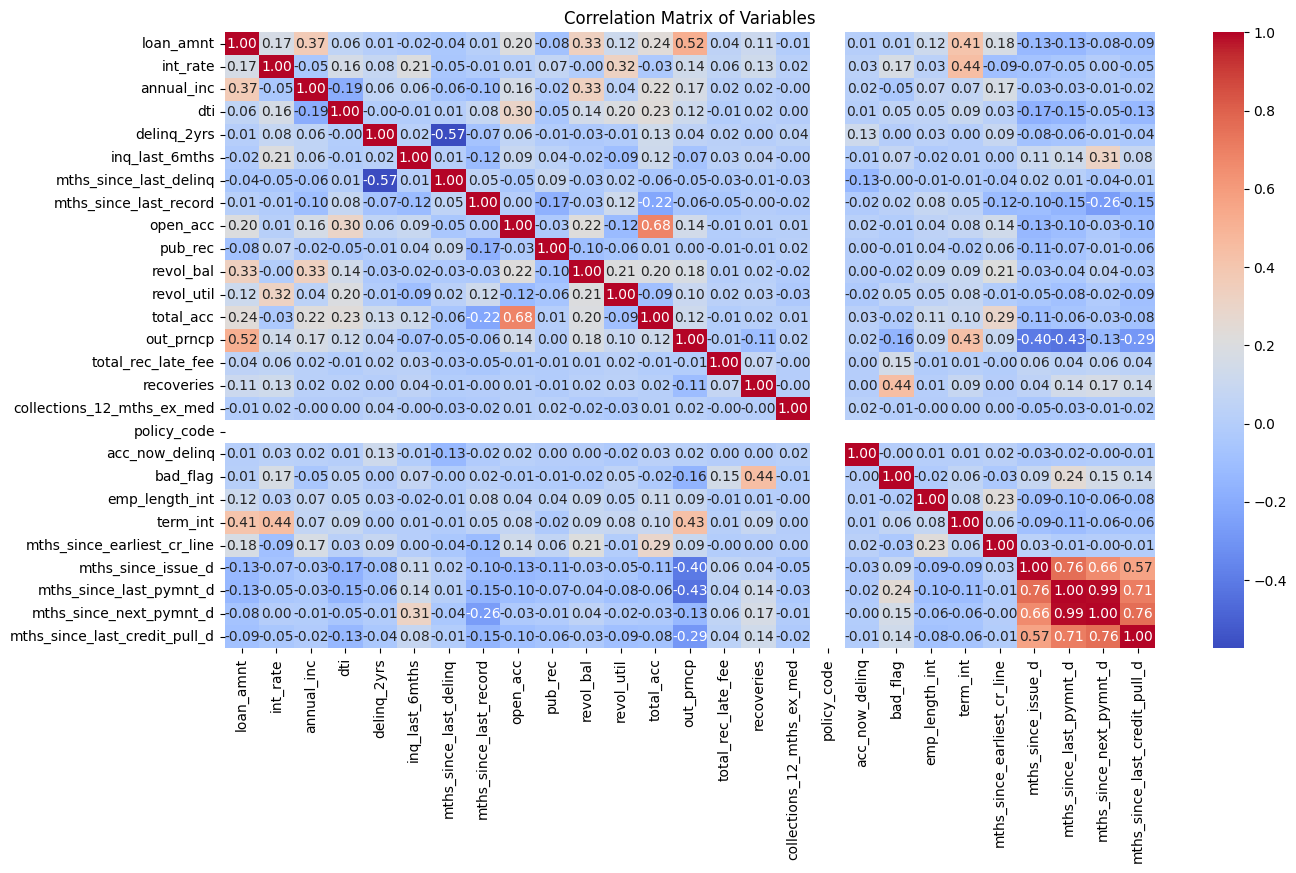

In [ ]:
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

## Check Cardinality Data

### Categorical Data

In [ ]:
# Display the number of unique values for features with object data type
print(data.select_dtypes(include='object').nunique())

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63098
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64


The output shows the number of unique values for features with an object data type. Key observations are:

* **emp_title** has 205,475 unique values, and **title** has 63,098 unique values, suggesting these variables have many unique entries, which may not add significant value for analysis or modeling.

* **application_type** only has 1 unique value, making it redundant and unnecessary for analysis.

In [ ]:
# Drop three features
data.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

### Numerical Data

In [ ]:
# Display the number of unique values for features with non-object data types
print(data.select_dtypes(exclude='object').nunique())

loan_amnt                          1352
int_rate                            506
annual_inc                        31901
dti                                3997
delinq_2yrs                          24
inq_last_6mths                       28
mths_since_last_delinq              145
mths_since_last_record              123
open_acc                             62
pub_rec                              26
revol_bal                         58142
revol_util                         1269
total_acc                           112
out_prncp                        135665
total_rec_late_fee                 5808
recoveries                        22773
collections_12_mths_ex_med            9
policy_code                           1
acc_now_delinq                        6
bad_flag                              2
emp_length_int                       10
term_int                              2
mths_since_earliest_cr_line         515
mths_since_issue_d                   91
mths_since_last_pymnt_d              98


The output shows the number of unique values for non-object features.

* **policy_code** has only 1 unique value, making it redundant and irrelevant for analysis.

In [ ]:
# Drop the 'policy_code' feature
data.drop(['policy_code'], axis=1, inplace=True)

## Check Cardinality Data

In [ ]:
# Loop through each feature with object data type
for col in data.select_dtypes(include='object').columns.tolist():
    # Display the distribution of unique values for each feature
    print("Distribution of unique values for feature", col)
    print(data[col].value_counts(normalize=True) * 100)
    print('\n')

Distribution of unique values for feature grade
grade
B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: proportion, dtype: float64


Distribution of unique values for feature home_ownership
home_ownership
MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: proportion, dtype: float64


Distribution of unique values for feature verification_status
verification_status
Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: proportion, dtype: float64


Distribution of unique values for feature pymnt_plan
pymnt_plan
n    99.99807
y     0.00193
Name: proportion, dtype: float64


Distribution of unique values for feature purpose
purpose
debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business    

At this point, features that are significantly dominated by a single value will be removed from the dataset. This is done to eliminate features that do not provide variation or additional information in the modeling process.

In [ ]:
# Drop the 'pymnt_plan' feature from the dataset
data.drop('pymnt_plan', axis=1, inplace=True)

## Univariate Analysis

### Categorical Data

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status'],
      dtype='object')


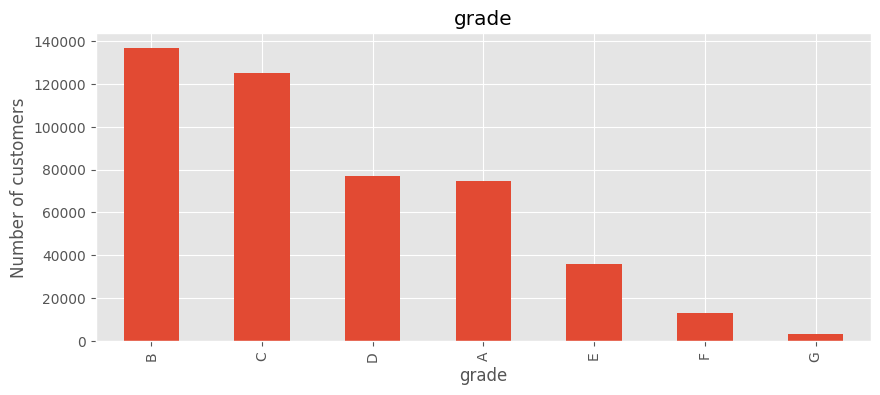

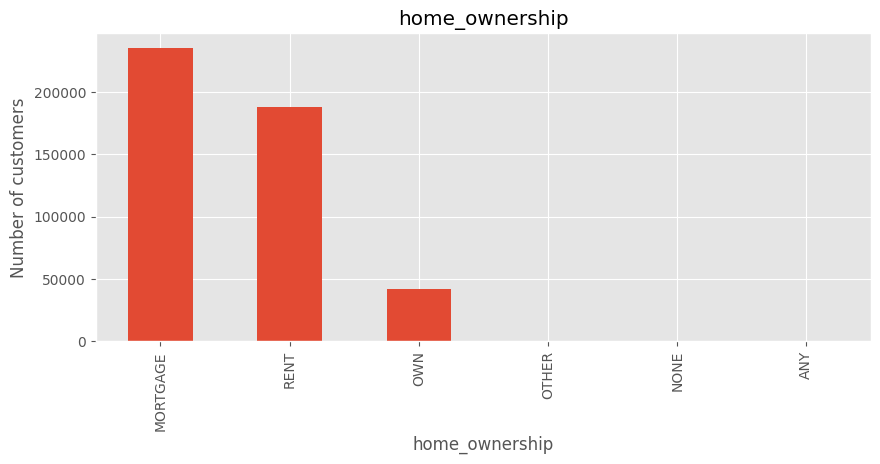

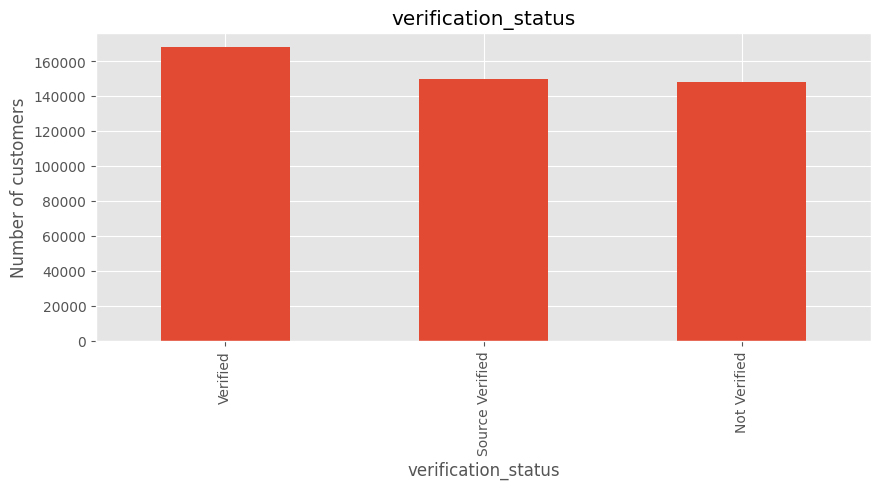

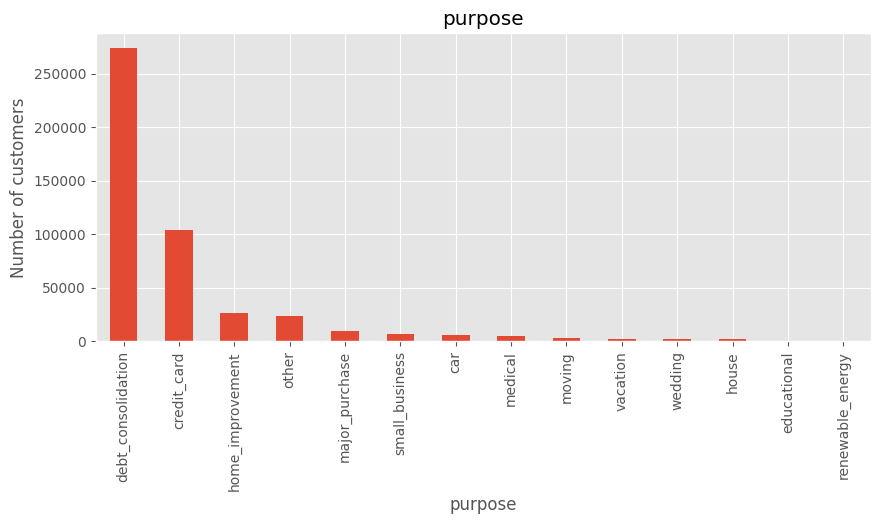

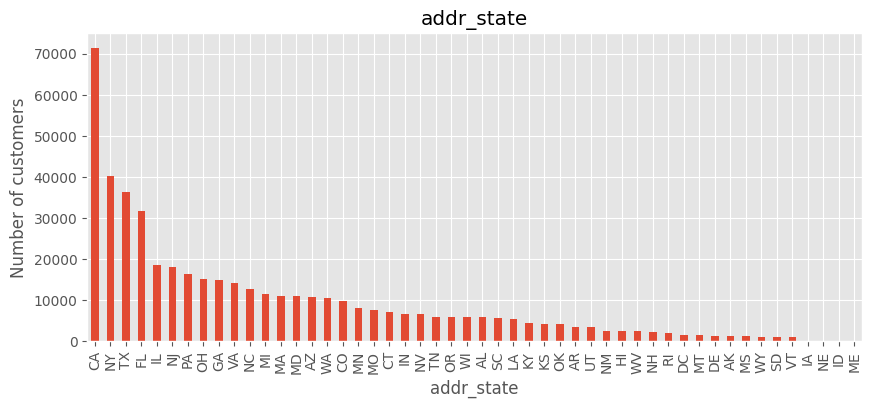

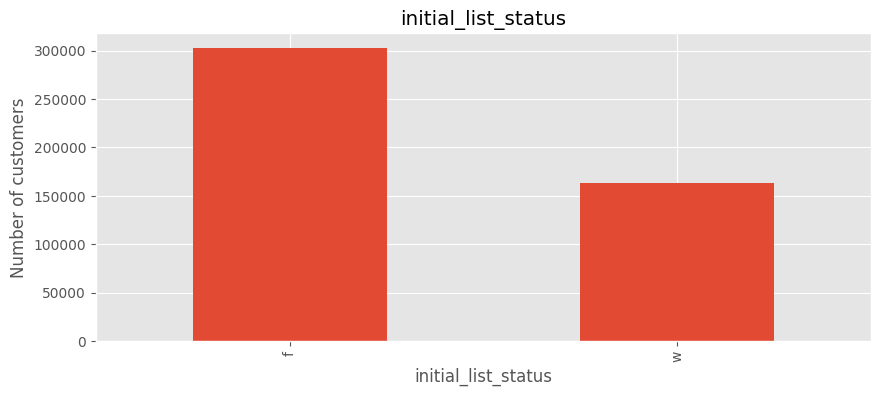

In [ ]:
# Identify categorical variables
cat_var = data.select_dtypes(include=["object"]).columns
print(cat_var)

# Create a bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(10, 4))
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("Number of customers")
    plt.title(column)
    plt.show()

## Numerical Data

In [ ]:
# Identifying the numerical variables
num_var=data.select_dtypes(include=np.number)
num_var.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,...,collections_12_mths_ex_med,acc_now_delinq,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,5000,10.65,24000.0,27.65,0.0,1.0,NaN,NaN,3.0,0.0,...,0.0,0.0,0,10.0,36.0,395.0,72,35.0,NaN,23.0
1,2500,15.27,30000.0,1.00,0.0,5.0,NaN,NaN,3.0,0.0,...,0.0,0.0,1,1.0,60.0,224.0,72,56.0,NaN,51.0
2,2400,15.96,12252.0,8.72,0.0,2.0,NaN,NaN,2.0,0.0,...,0.0,0.0,0,10.0,36.0,193.0,72,42.0,NaN,23.0
3,10000,13.49,49200.0,20.00,0.0,1.0,35.0,NaN,10.0,0.0,...,0.0,0.0,0,10.0,36.0,262.0,72,35.0,NaN,35.0
4,3000,12.69,80000.0,17.94,0.0,0.0,38.0,NaN,15.0,0.0,...,0.0,0.0,0,1.0,60.0,263.0,72,23.0,22.0,23.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari loan_amnt
Rata-rata  : 14317.28
Standar deviasi : 8286.51
Median  : 12000.00
Mode  : 10000


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari int_rate
Rata-rata  : 13.83
Standar deviasi : 4.36
Median  : 13.66
Mode  : 12.99


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari annual_inc
Rata-rata  : 73277.38
Standar deviasi : 54963.57
Median  : 63000.00
Mode  : 60000.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari dti
Rata-rata  : 17.22
Standar deviasi : 7.85
Median  : 16.87
Mode  : 14.4


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari delinq_2yrs
Rata-rata  : 0.28
Standar deviasi : 0.80
Median  : 0.00
Mode  : 0.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari inq_last_6mths
Rata-rata  : 0.80
Standar deviasi : 1.09
Median  : 0.00
Mode  : 0.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari mths_since_last_delinq
Rata-rata  : 34.10
Standar deviasi : 21.78
Median  : 31.00
Mode  : 9.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari mths_since_last_record
Rata-rata  : 74.31
Standar deviasi : 30.36
Median  : 76.00
Mode  : 0.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari open_acc
Rata-rata  : 11.19
Standar deviasi : 4.99
Median  : 10.00
Mode  : 9.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari pub_rec
Rata-rata  : 0.16
Standar deviasi : 0.51
Median  : 0.00
Mode  : 0.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari revol_bal
Rata-rata  : 16230.20
Standar deviasi : 20676.25
Median  : 11764.00
Mode  : 0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari revol_util
Rata-rata  : 56.18
Standar deviasi : 23.73
Median  : 57.60
Mode  : 0.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari total_acc
Rata-rata  : 25.06
Standar deviasi : 11.60
Median  : 23.00
Mode  : 21.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari out_prncp
Rata-rata  : 4410.06
Standar deviasi : 6355.08
Median  : 441.47
Mode  : 0.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari total_rec_late_fee
Rata-rata  : 0.65
Standar deviasi : 5.27
Median  : 0.00
Mode  : 0.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari recoveries
Rata-rata  : 85.34
Standar deviasi : 552.22
Median  : 0.00
Mode  : 0.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari collections_12_mths_ex_med
Rata-rata  : 0.01
Standar deviasi : 0.11
Median  : 0.00
Mode  : 0.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari acc_now_delinq
Rata-rata  : 0.00
Standar deviasi : 0.07
Median  : 0.00
Mode  : 0.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari bad_flag
Rata-rata  : 0.11
Standar deviasi : 0.31
Median  : 0.00
Mode  : 0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari emp_length_int
Rata-rata  : 6.07
Standar deviasi : 3.50
Median  : 6.00
Mode  : 10.0


<ipython-input-66-ec641159ebf7>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20, 4))
<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari term_int
Rata-rata  : 42.61
Standar deviasi : 10.72
Median  : 36.00
Mode  : 36.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari mths_since_earliest_cr_line
Rata-rata  : 242.39
Standar deviasi : 86.46
Median  : 226.00
Mode  : 206.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari mths_since_issue_d
Rata-rata  : 51.26
Standar deviasi : 14.34
Median  : 47.00
Mode  : 38


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari mths_since_last_pymnt_d
Rata-rata  : 31.29
Standar deviasi : 12.81
Median  : 24.00
Mode  : 23.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari mths_since_next_pymnt_d
Rata-rata  : 22.74
Standar deviasi : 6.08
Median  : 22.00
Mode  : 22.0


<ipython-input-66-ec641159ebf7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], kde=True)


Ringkasan statistik dari mths_since_last_credit_pull_d
Rata-rata  : 27.05
Standar deviasi : 9.64
Median  : 23.00
Mode  : 23.0


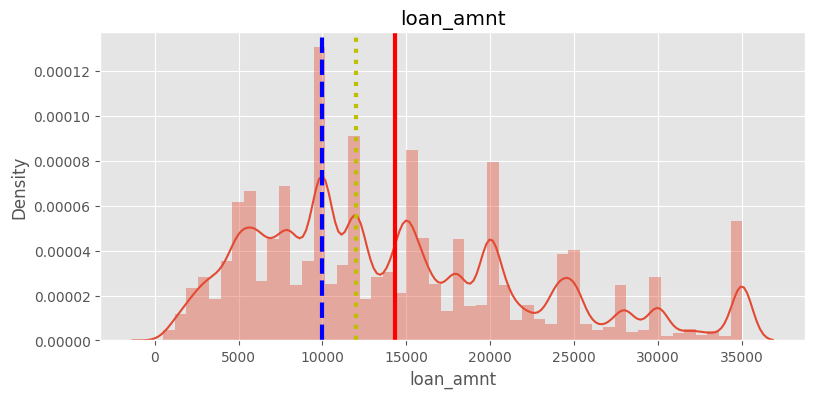

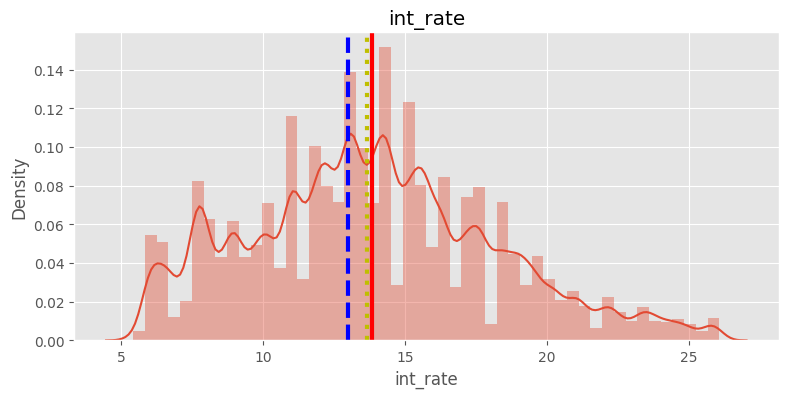

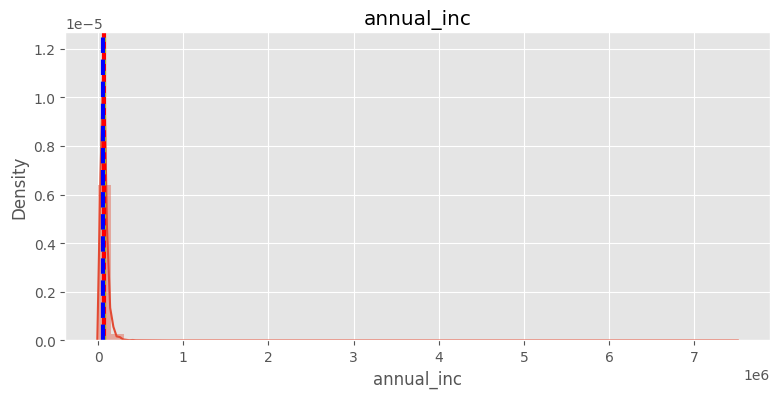

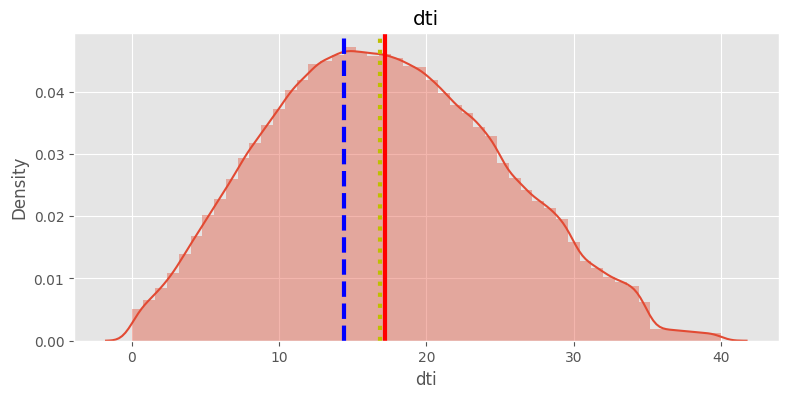

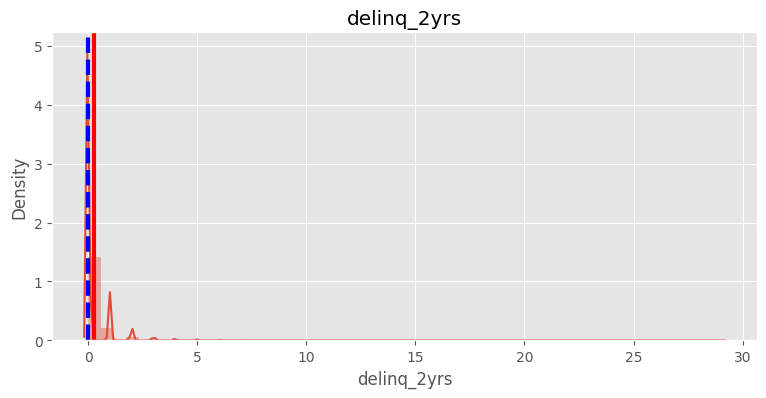

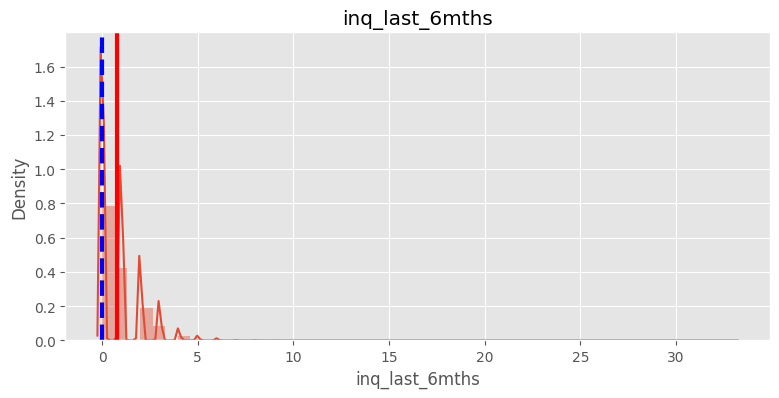

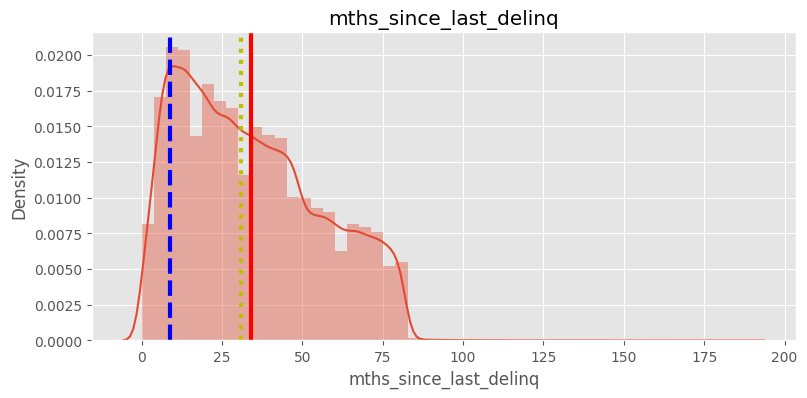

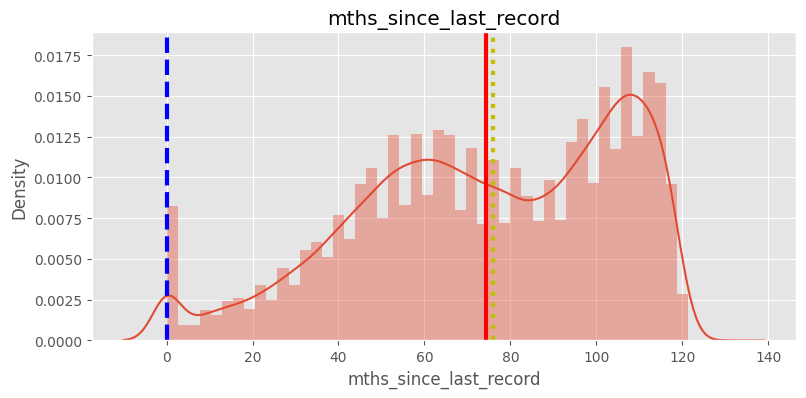

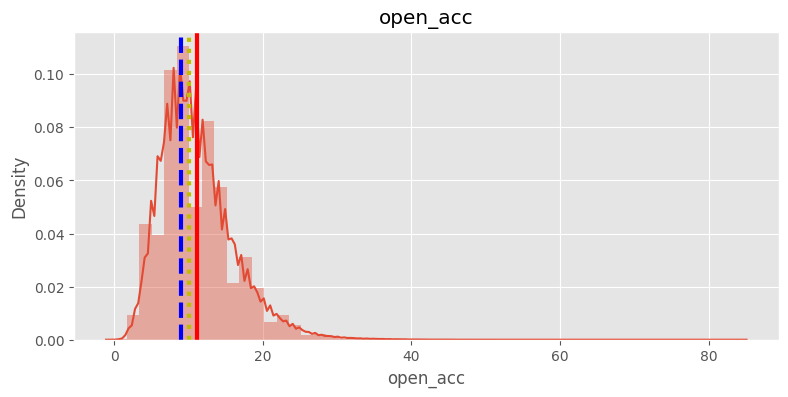

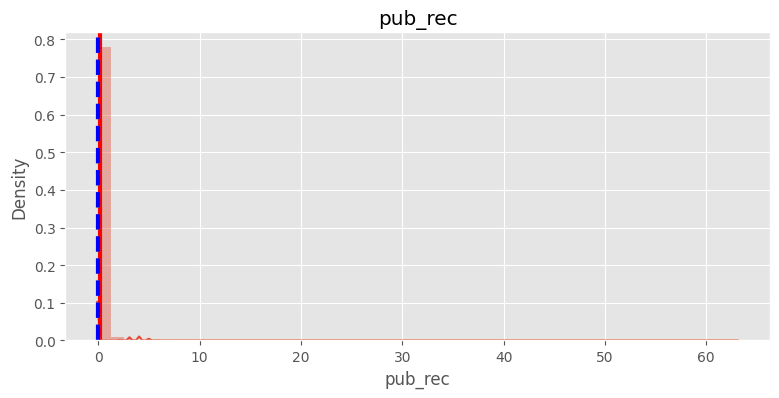

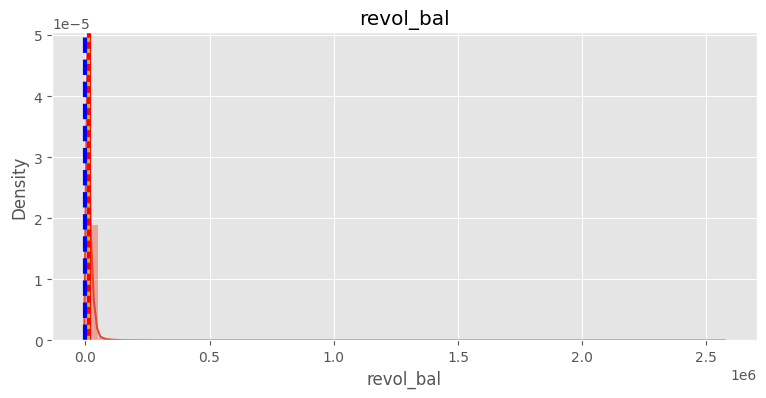

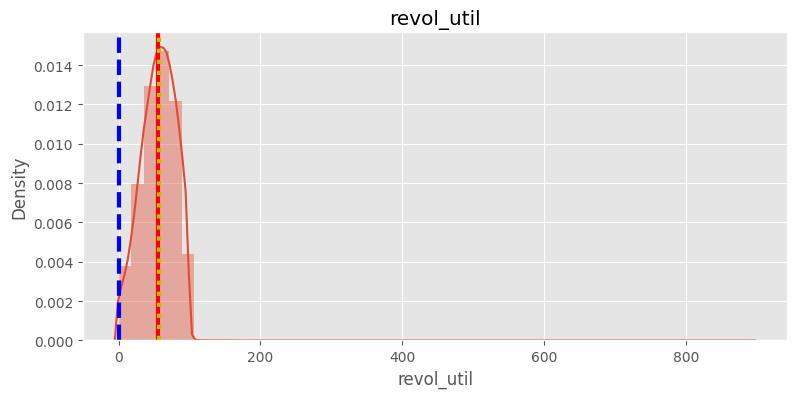

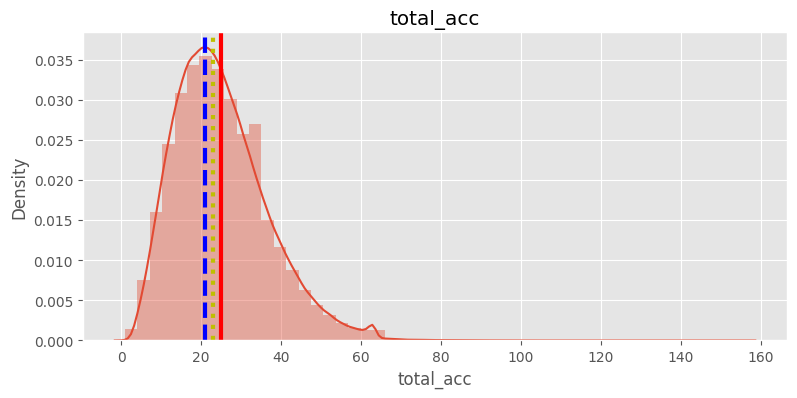

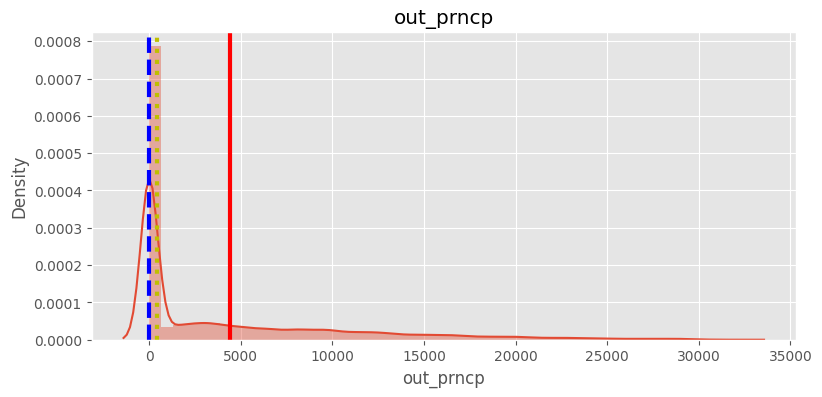

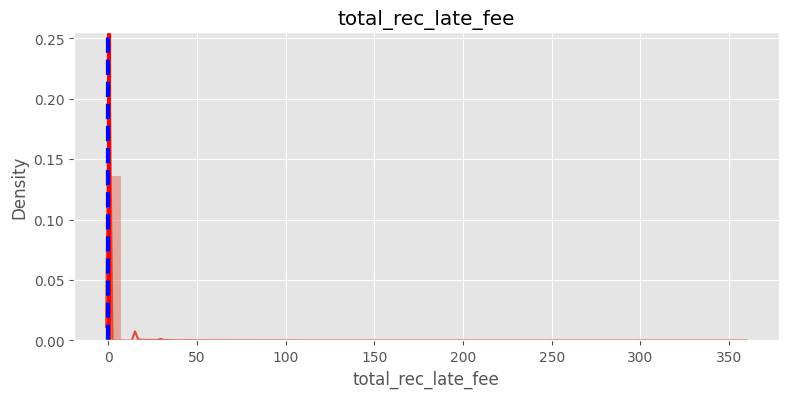

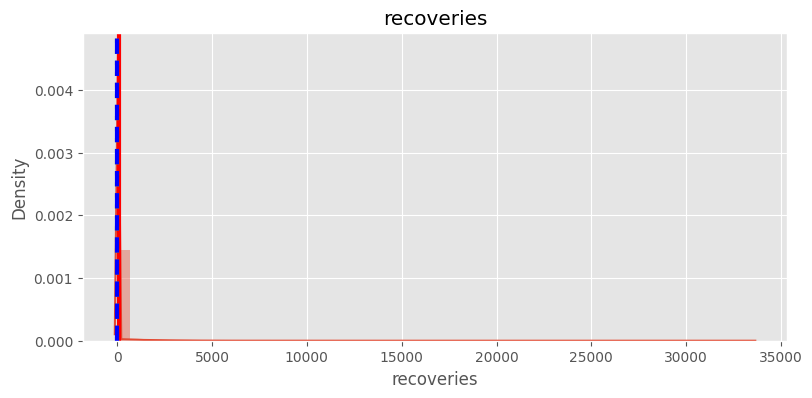

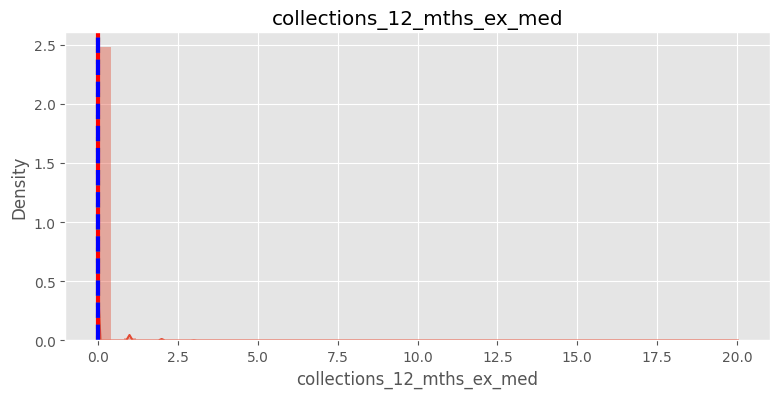

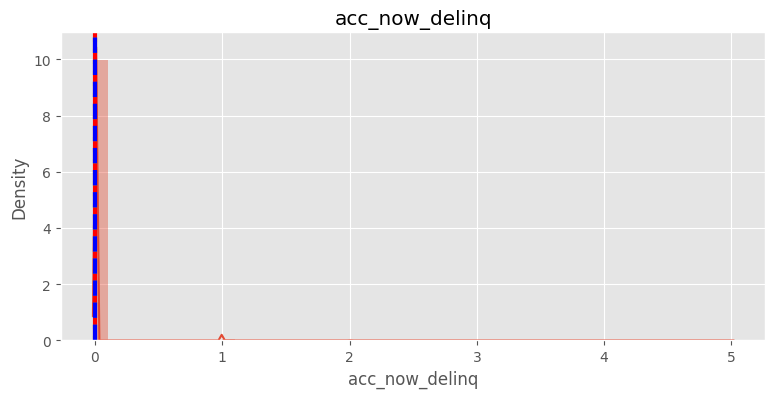

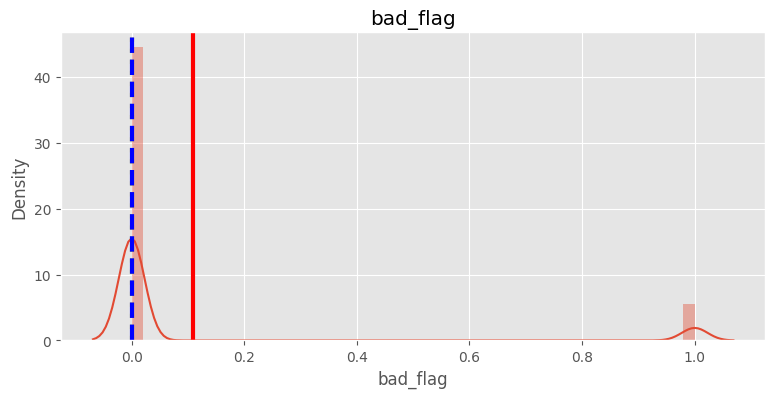

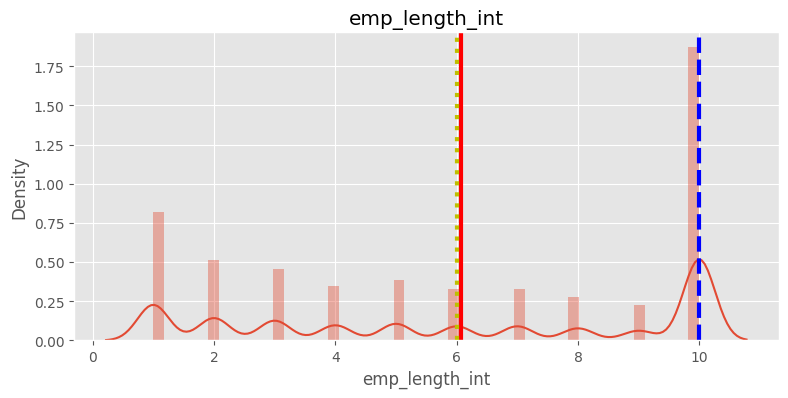

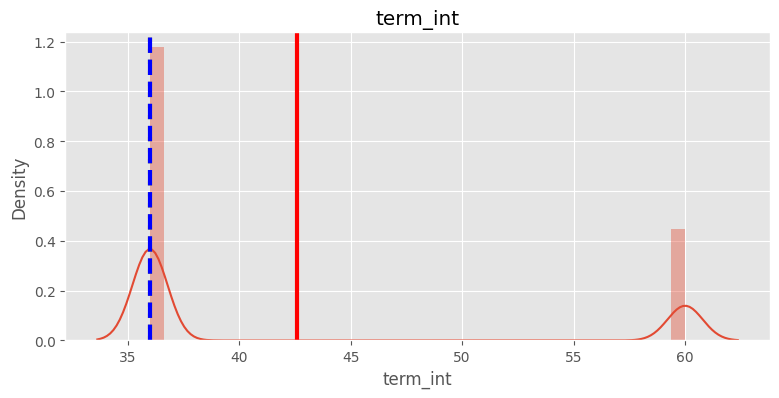

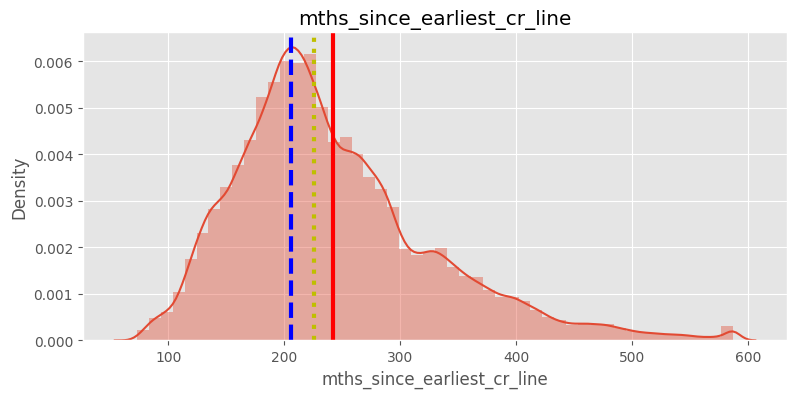

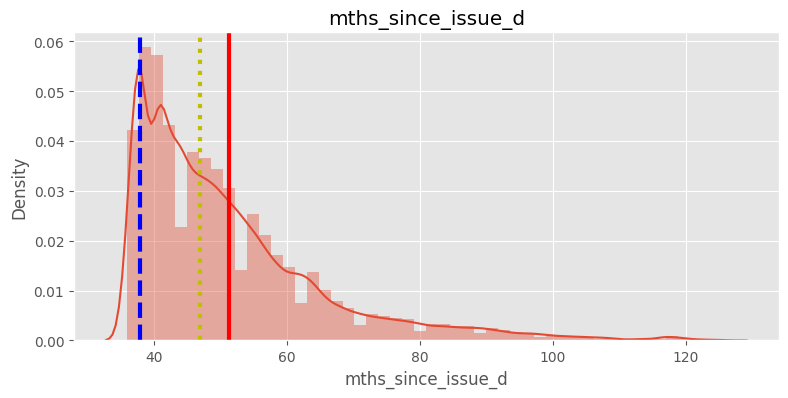

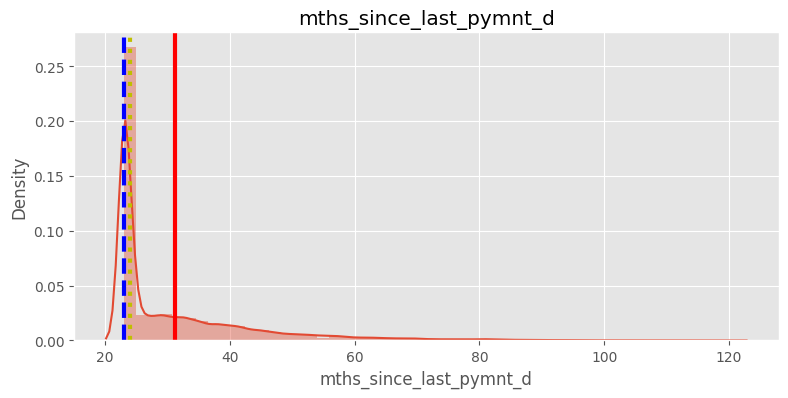

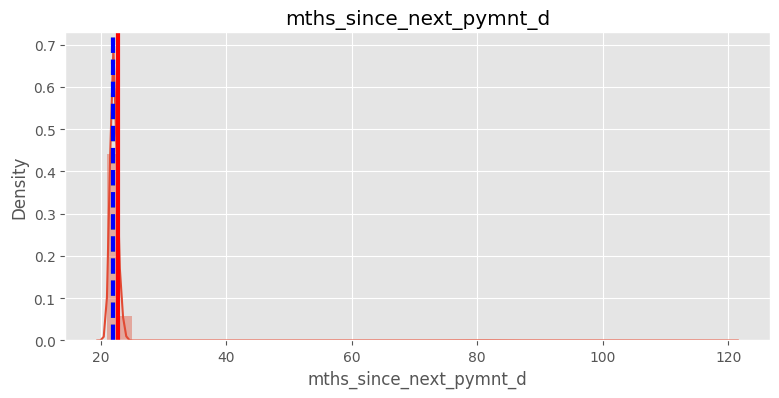

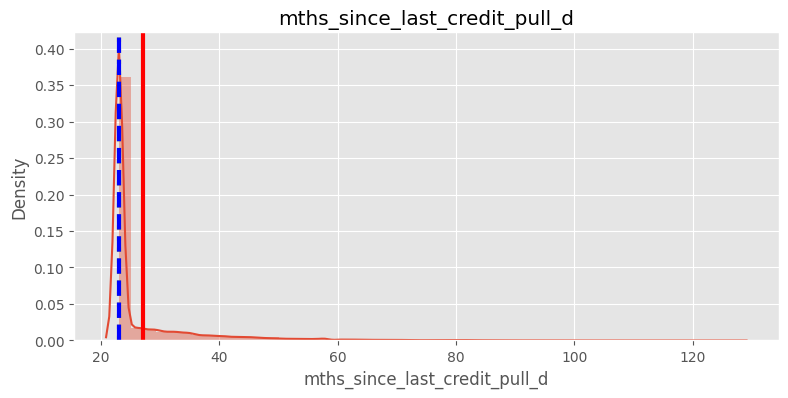

In [ ]:
# Plotting histogram untuk setiap variabel numerik
plt.style.use("ggplot")

for column in data.select_dtypes(exclude='object').columns.tolist():
    # Menghitung statistik deskriptif
    average = data[column].mean()
    median = data[column].median()
    mode = data[column].mode().iloc[0]  # Mengambil mode pertama (karena bisa ada lebih dari satu mode)
    std = data[column].std()

    # Membuat subplot untuk histogram
    plt.figure(figsize=(20, 4))
    plt.subplot(121)
    sns.distplot(data[column], kde=True)
    plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
    plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
    plt.axvline(mode, color='b', linestyle='dashed', linewidth=3, label='Mode')
    plt.title(column)

    # Menampilkan ringkasan statistik
    print("Ringkasan statistik dari {columns}".format(columns=column))
    print("Rata-rata  :", "%.2f" % average)
    print("Standar deviasi :", "%.2f" % std)
    print("Median  :", "%.2f" % median)
    print("Mode  :", mode)


In [ ]:
# Plot histogram for each numeric variable
plt.style.use("ggplot")

for column in data.select_dtypes(exclude='object').columns.tolist():
    # Calculate descriptive statistics
    average = data[column].mean()
    median = data[column].median()
    mode = data[column].mode().iloc[0]  # Take the first mode (since there could be multiple modes)
    std = data[column].std()

    # Create a subplot for the histogram
    plt.figure(figsize=(20, 4))
    plt.subplot(121)
    sns.distplot(data[column], kde=True)
    plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
    plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
    plt.axvline(mode, color='b', linestyle='dashed', linewidth=3, label='Mode')
    plt.title(column)

    # Display summary statistics
    print(f"Summary statistics for {column}")
    print(f"Mean  : {average:.2f}")
    print(f"Standard Deviation : {std:.2f}")
    print(f"Median  : {median:.2f}")
    print(f"Mode  : {mode}")


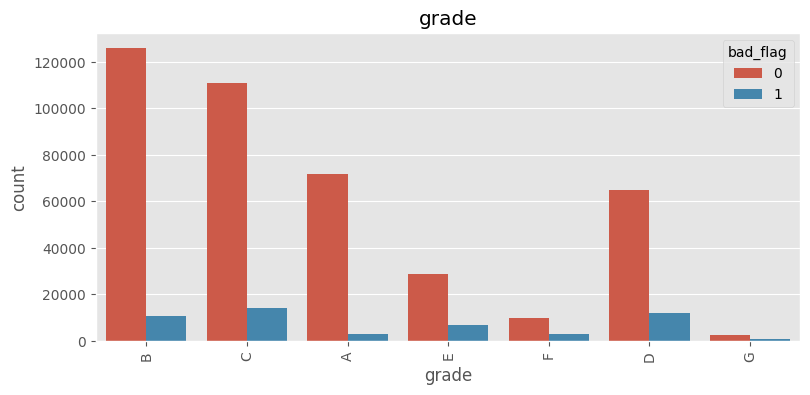

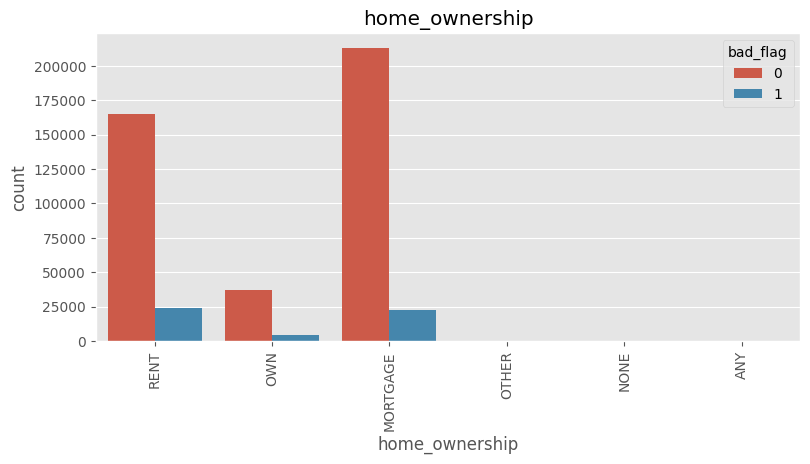

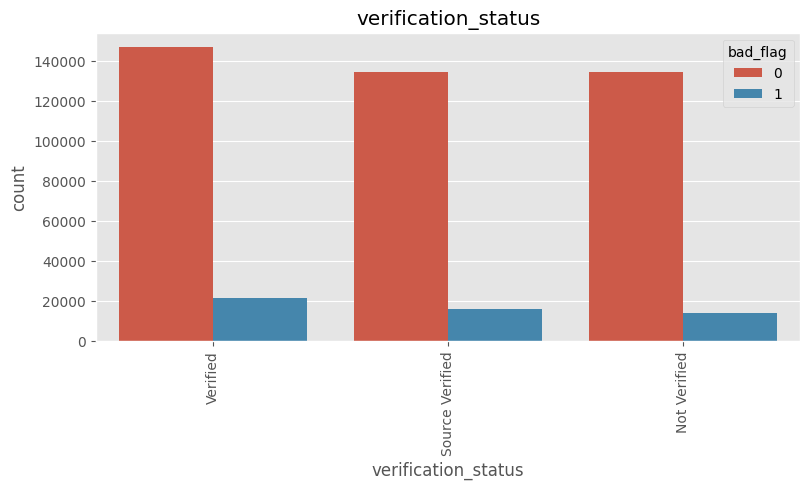

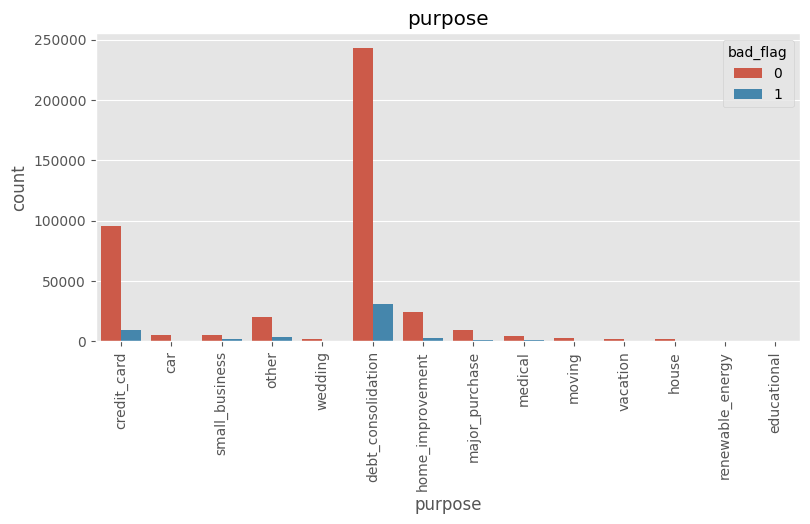

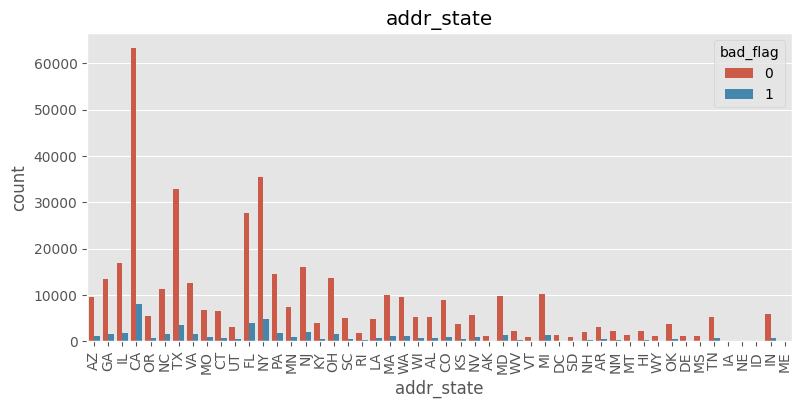

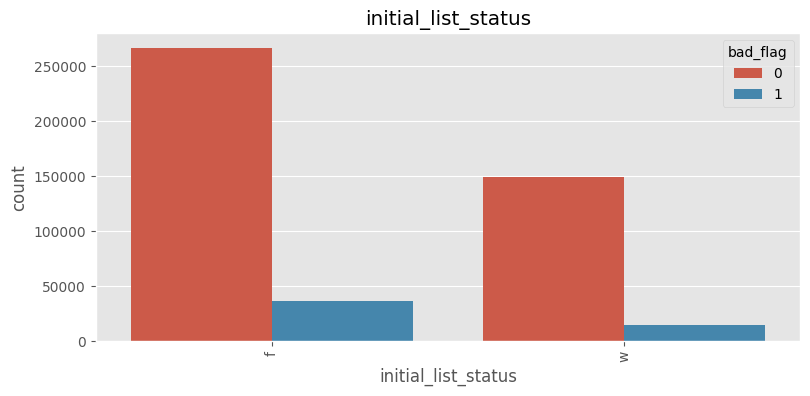

In [ ]:
# Plotting categorical data
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20, 4))
    plt.subplot(121)
    sns.countplot(x=data[column], hue=data["bad_flag"])
    plt.title(column)
    plt.xticks(rotation=90)

# **Data Preprocessing**

## Check Missing Value

In [ ]:
# Calculate the percentage of missing values for each feature
check_missing = data.isnull().sum() * 100 / data.shape[0]

# Select only features with missing values
missing_values = check_missing[check_missing > 0].sort_values(ascending=False)

# Display the results
print("Percentage of missing values for each feature:")
print(missing_values)

Percentage of missing values for each feature:
mths_since_last_record           86.566585
mths_since_last_delinq           53.690554
mths_since_next_pymnt_d          48.728567
emp_length_int                    4.505399
mths_since_last_pymnt_d           0.080637
revol_util                        0.072917
collections_12_mths_ex_med        0.031097
mths_since_last_credit_pull_d     0.009007
delinq_2yrs                       0.006219
pub_rec                           0.006219
inq_last_6mths                    0.006219
open_acc                          0.006219
acc_now_delinq                    0.006219
total_acc                         0.006219
mths_since_earliest_cr_line       0.006219
annual_inc                        0.000858
dtype: float64


The output shows the percentage of missing values for each feature. The mths_since_last_record column has the highest percentage of missing values at 86.57%, followed by mths_since_last_delinq at 53.69%, and mths_since_next_pymnt_d at 48.73%.

In [ ]:
data.drop('mths_since_last_record', axis=1, inplace=True)

mths_since_last_record is dropped because it has a very high percentage of missing data (86.57%), which would likely affect the accuracy of the model and might not provide valuable information.

## Data Imputation (Handling Missing Value)

In [ ]:
data['annual_inc'].fillna(data['annual_inc'].median(), inplace=True)
data['mths_since_next_pymnt_d'].fillna(0, inplace=True)
data['mths_since_last_pymnt_d'].fillna(0, inplace=True)
data['mths_since_last_credit_pull_d'].fillna(0, inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)

<ipython-input-54-82b01d4dccaa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['annual_inc'].fillna(data['annual_inc'].median(), inplace=True)
<ipython-input-54-82b01d4dccaa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
# Calculate the percentage of missing values for each feature
check_missing = data.isnull().sum() * 100 / data.shape[0]

# Select only features with missing values
missing_values = check_missing[check_missing > 0].sort_values(ascending=False)

# Display the results
print("Percentage of missing values for each feature:")
print(missing_values)

Percentage of missing values for each feature:
Series([], dtype: float64)


After handling the missing values, the output shows that there are no features with missing data, as the percentage of missing values for each feature is 0%. This indicates that all the missing values have been successfully filled or addressed.

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for column in cat_var:
    data[column] = label.fit_transform(data[column])

In [ ]:
data.head()

,loan_amnt,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,...,collections_12_mths_ex_med,acc_now_delinq,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,5000,10.65,1,5,24000.0,2,1,3,27.65,0.0,...,0.0,0.0,0,10.0,36.0,395.0,72,35.0,0.0,23.0
1,2500,15.27,2,5,30000.0,1,0,10,1.00,0.0,...,0.0,0.0,1,1.0,60.0,224.0,72,56.0,0.0,51.0
2,2400,15.96,2,5,12252.0,0,11,14,8.72,0.0,...,0.0,0.0,0,10.0,36.0,193.0,72,42.0,0.0,23.0
3,10000,13.49,2,5,49200.0,1,9,4,20.00,0.0,...,0.0,0.0,0,10.0,36.0,262.0,72,35.0,0.0,35.0
4,3000,12.69,1,5,80000.0,1,9,36,17.94,0.0,...,0.0,0.0,0,1.0,60.0,263.0,72,23.0,22.0,23.0


## Handling Imbalance Data

In [ ]:
# Handling imbalanced data
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = data.drop('bad_flag', axis=1)
y = data['bad_flag']

# Apply SMOTE for oversampling
oversampling = SMOTE(random_state=12, sampling_strategy=1)

# Fit the oversampling
X, y = oversampling.fit_resample(X, y)

# Display the class distribution after oversampling
y.value_counts()

,count
bad_flag,
0,415317
1,415317


The output shows the distribution of the target variable bad_flag after applying SMOTE (Synthetic Minority Over-sampling Technique) for oversampling. The distribution of bad_flag is now balanced, with 415,317 instances for both 0 (Good) and 1 (Bad) classes.

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing data
print("Shape of the training data:", X_train.shape)
print("Shape of the testing data:", X_test.shape)

Shape of the training data: (664507, 30)
Shape of the testing data: (166127, 30)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled.head()

,loan_amnt,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,...,recoveries,collections_12_mths_ex_med,acc_now_delinq,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,-0.655338,-0.739984,-0.737672,-1.047929,-0.156260,-1.212322,-0.719004,-0.972603,-0.046791,-0.383581,...,-0.356685,-0.090102,-0.062169,0.676673,-0.710783,0.946491,-0.834034,-0.884817,1.102379,-0.556247
1,-0.294417,-0.028644,0.066801,-1.047929,-0.195944,0.054616,-0.286823,1.595712,0.053345,2.307251,...,-0.356685,-0.090102,-0.062169,1.266290,-0.710783,0.658347,-0.690301,-0.884817,1.102379,-0.556247
2,1.696663,0.208088,0.066801,-1.047929,1.052085,0.054616,-0.719004,-0.825842,-0.355908,-0.013332,...,-0.356685,-0.090102,-0.062169,-0.015785,-0.080554,0.397491,-0.762168,-0.665137,1.124846,-0.556247
3,-1.076412,-0.902849,-0.737672,-1.047929,0.109619,-1.212322,-0.286823,-0.165418,1.337509,0.961835,...,-0.356685,-0.090102,-0.062169,1.266290,-0.710783,0.182282,-0.762168,-0.884817,1.102379,-0.556247
4,-0.805240,0.996753,0.066801,1.178765,0.101682,0.054616,1.874084,0.348244,-0.902416,0.234488,...,0.351868,-0.090102,-0.062169,0.201289,-0.710783,1.033203,-0.259103,0.309239,-0.693715,0.436181


# **Data Modeling**

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

# **Evaluation** (ROC-AUC)

## Training Model

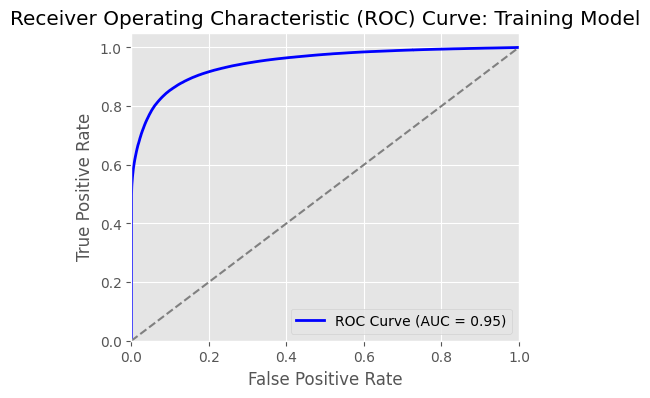

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_prob = logreg.predict_proba(X_train_scaled)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc = roc_auc_score(y_train, y_prob)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Training Model')
plt.legend(loc='lower right')
plt.show()

The ROC curve above shows the performance of the training model, with an AUC (Area Under the Curve) value of 0.95.

* The True Positive Rate (TPR) is plotted on the y-axis, and the False Positive Rate (FPR) is on the x-axis.

* The curve is very close to the top-left corner, which indicates a good model performance.

* An AUC of 0.95 means that the model has a very high probability of distinguishing between positive and negative classes, which is a strong indicator of its ability to correctly predict bad and good loans.

Overall, the model performs well, as the closer the AUC is to 1, the better the model's ability to classify correctly.